# Finding the best chocolate bars

Now let's now move on to the competition and challenge.

## 📖 Background
You work at a specialty foods import company that wants to expand into gourmet chocolate bars. Your boss needs your team to research this market to inform your initial approach to potential suppliers.

After finding valuable chocolate bar ratings online, you need to explore if the chocolate bars with the highest ratings share any characteristics that could help you narrow your search for suppliers (e.g., cacao percentage, bean country of origin, etc.)

## 💾 The data

#### Your team created a file with the following information ([source](https://flavorsofcacao.com)):
- "id" - id number of the review
- "manufacturer" - Name of the bar manufacturer
- "company_location" - Location of the manufacturer
- "year_reviewed" - From 2006 to 2021
- "bean_origin" - Country of origin of the cacao beans
- "bar_name" - Name of the chocolate bar
- "cocoa_percent" - Cocoa content of the bar (%)
- "num_ingredients" - Number of ingredients
- "ingredients" - B (Beans), S (Sugar), S* (Sweetener other than sugar or beet sugar), C (Cocoa Butter), (V) Vanilla, (L) Lecithin, (Sa) Salt
- "review" - Summary of most memorable characteristics of the chocolate bar
- "rating" - 1.0-1.9 Unpleasant, 2.0-2.9 Disappointing, 3.0-3.49 Recommended, 3.5-3.9 Highly Recommended, 4.0-5.0 Oustanding

***Acknowledgments**: Brady Brelinski, Manhattan Chocolate Society*

## 💪 Challenge
Create a report to summarize your research. Include:

1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality? 
5. [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).
7. Summarize your findings.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('data/chocolate_bars.csv')
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [4]:
#1 What is the average rating by country of origin?

avg_by_ctry=df.groupby("bean_origin")[["rating"]].mean().sort_values("rating", ascending=0).round(2)
print("Average rating per bean's country origin:")
avg_by_ctry

Average rating per bean's country origin:


,rating
bean_origin,
Tobago,3.62
China,3.50
Sao Tome & Principe,3.50
Solomon Islands,3.45
Congo,3.32
...,...
Sierra Leone,2.75
St.Vincent-Grenadines,2.75
Principe,2.75


In [5]:
#2 How many bars were reviewed for each of those countries?

bars_reviewed=df["bean_origin"].value_counts().to_frame()
print("Number of reviews per bean's country origin:")
bars_reviewed

Number of reviews per bean's country origin:


,bean_origin
Venezuela,253
Peru,244
Dominican Republic,226
Ecuador,219
Madagascar,177
...,...
Sumatra,1
St.Vincent-Grenadines,1
Martinique,1
Burma,1


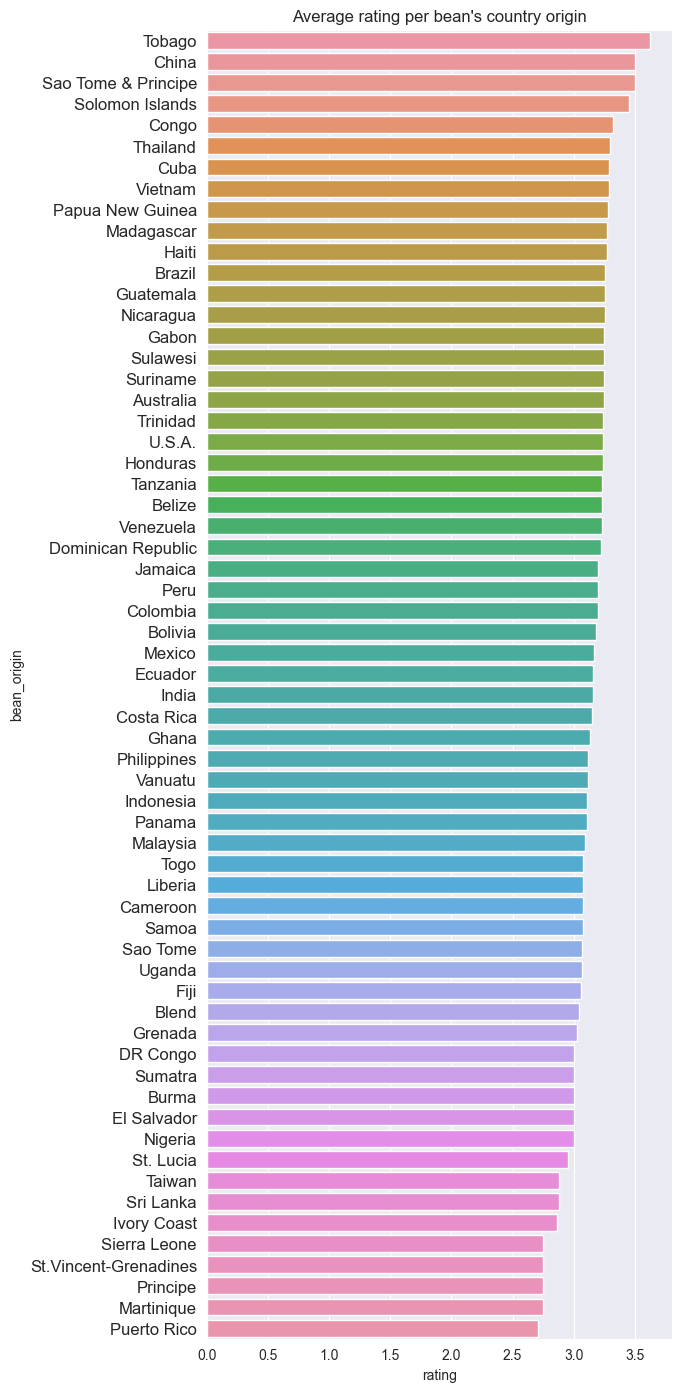

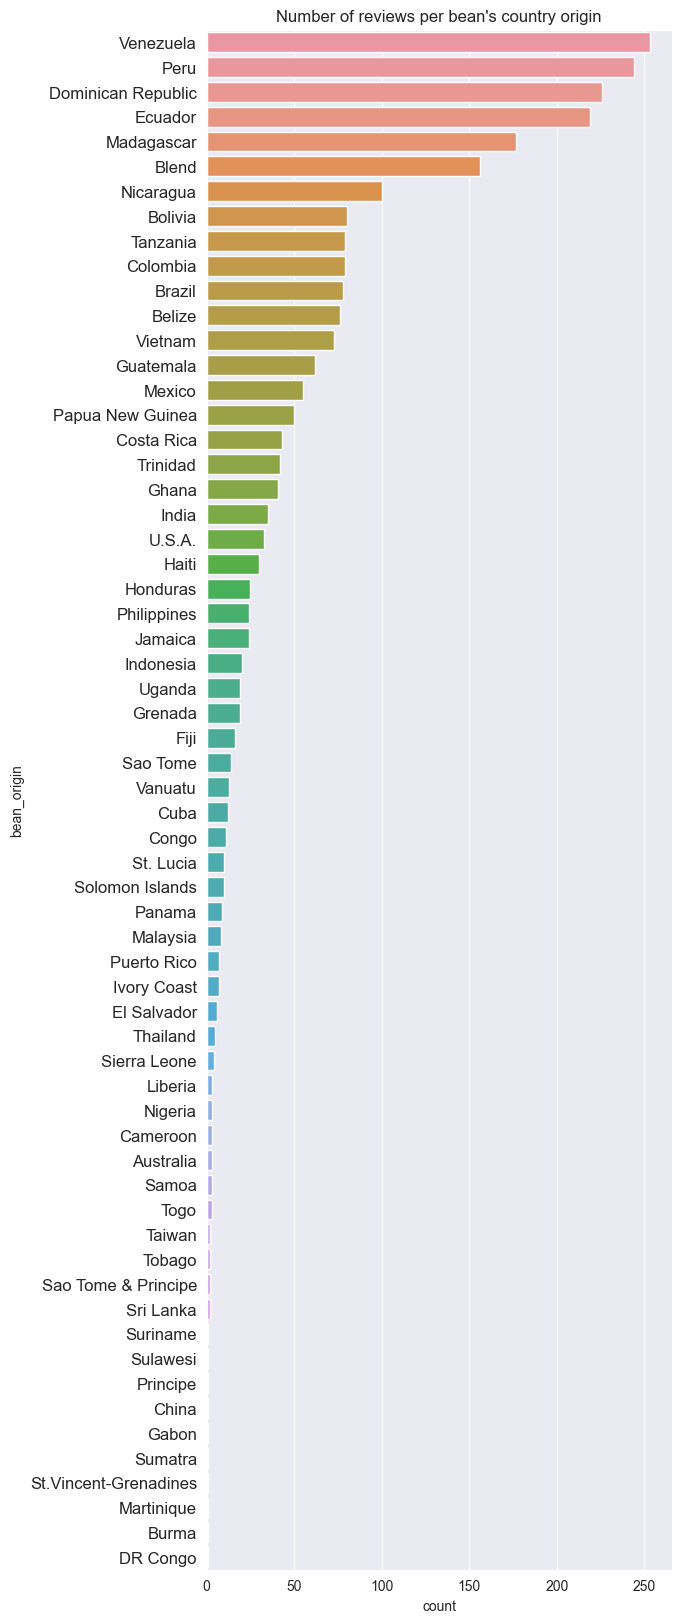

In [6]:
#3 Create plots to visualize findings for questions 1 and 2.

plt.figure(figsize=[6,17])
sns.set_style("darkgrid")
plt.yticks(fontsize=12)
sns.barplot(data=avg_by_ctry, y=avg_by_ctry.index, x="rating")
plt.title("Average rating per bean's country origin")
plt.show()

plt.figure(figsize=[6,20])
sns.countplot(y="bean_origin", data=df, order=bars_reviewed.index)
plt.yticks(fontsize=12)
plt.title("Number of reviews per bean's country origin")
plt.show()

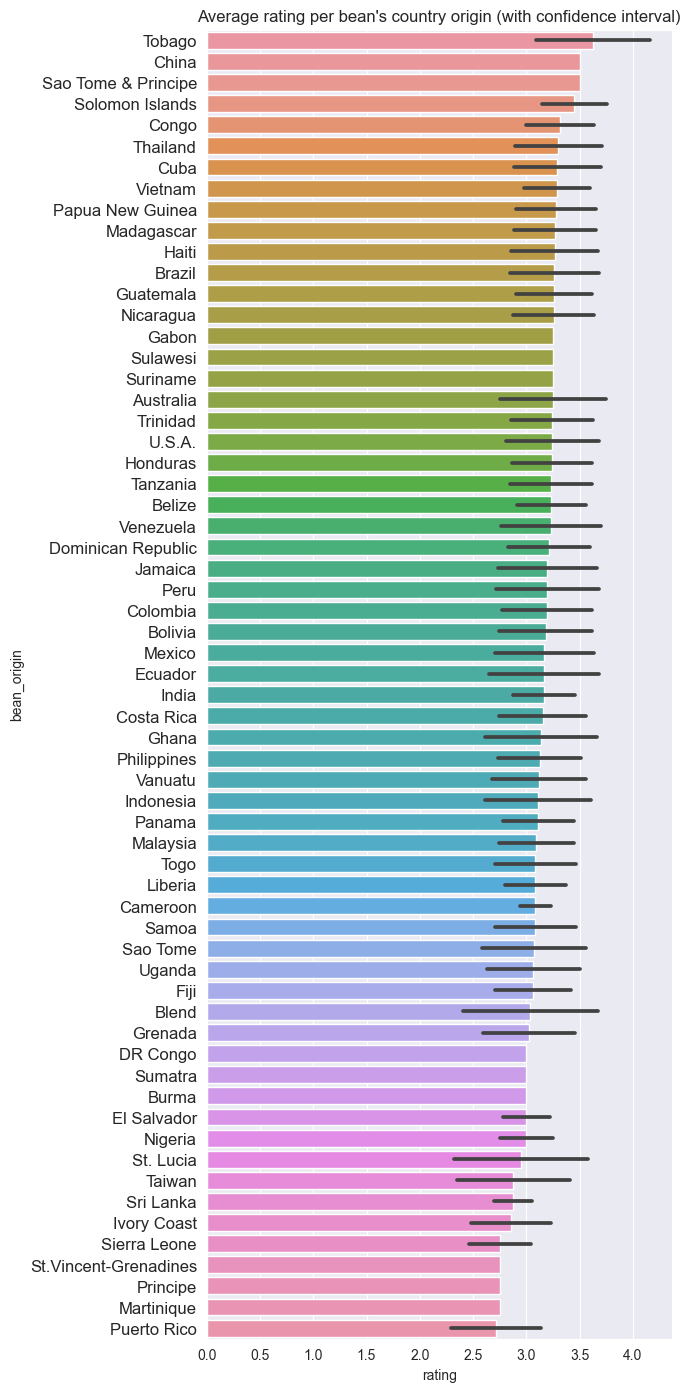

Looking at the graph, there's a considerable deviation in the mean rating per bean's country origin for most countries. Those without a confidence interval, either have very few coincidental rating entries, or have a unique entry. So the bean's country origin doesn't seem to be an indicator of quality.


In [7]:
#4 Is the cacao bean's origin an indicator of quality?

plt.figure(figsize=[6,17])
sns.barplot(y="bean_origin", x="rating", data=df, estimator=np.mean,
               ci="sd", order=avg_by_ctry.index)
plt.title("Average rating per bean's country origin (with confidence interval)")
plt.yticks(fontsize=12)
plt.show()

print("Looking at the graph, there's a considerable deviation in the mean rating per bean's country origin for most countries. \
Those without a confidence interval, either have very few coincidental rating entries, or have a unique entry. So the bean's \
country origin doesn't seem to be an indicator of quality.")

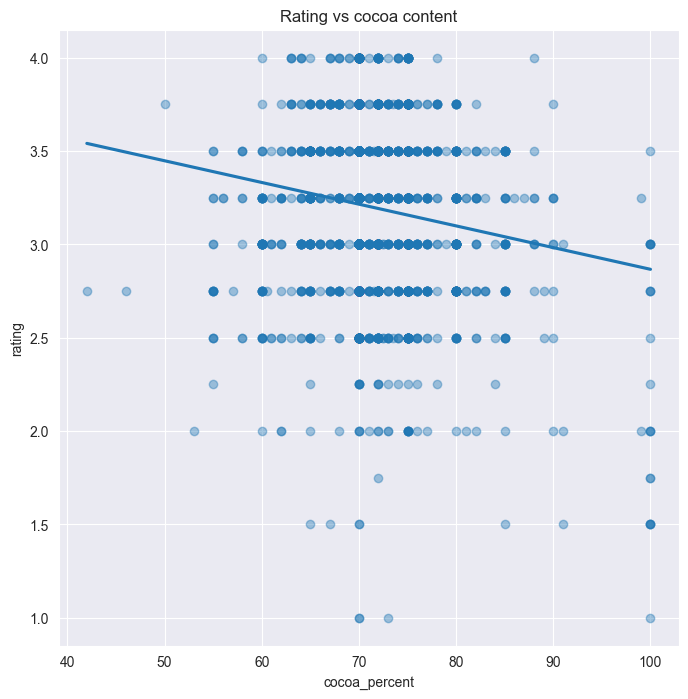

The greater the cocoa content, the slightly lower the rating tends to be.
Average cocoa percent for ratings > 3.5: 70.95%


In [10]:
#5 [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings 
# (above 3.5)?

plt.figure(figsize=[8,8])
sns.regplot(x="cocoa_percent", y="rating", data=df, scatter_kws={'alpha' : .4}, ci=None)
plt.title("Rating vs cocoa content")
plt.show()
print("The greater the cocoa content, the slightly lower the rating tends to be.")

avg_coc=df[df["rating"]>3.5]["cocoa_percent"].mean()
print("Average cocoa percent for ratings > 3.5: {:.2f}%".format(avg_coc))

In [11]:
#6 [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of 
# bars with and without lecithin (L in the ingredients).

df["contains_lecithin"] = df["ingredients"].str.contains("L")
L_means = df.groupby("contains_lecithin")[["rating"]].mean().sort_values("rating", ascending=True).round(2)

print("Average rating for bars with and without lecithin:")
L_means

Average rating for bars with and without lecithin:


,rating
contains_lecithin,
True,3.15
False,3.23
